In [1]:
# %%
import otmol as otm
import pandas as pd
from openbabel import pybel
import matplotlib.pyplot as plt
import os
from experiment_utils import wc_experiment
# %matplotlib widget

In [2]:
molecule_cluster_options = 'O'
save = False

In [3]:
data_path = "../Data/Water-Clusters"
mol_pair_list_path = os.path.join(data_path, 'list')
_molecule_pairs = otm.tl.parse_molecule_pairs(mol_pair_list_path, mol_type='water cluster')
molecule_pairs = []
for nameA, nameB in _molecule_pairs:
    molecule_pairs.append((nameA+'.xyz', nameB+'.xyz'))
otmol_res = wc_experiment(molecule_pairs, data_path, dataset_name = 'ArbAlignDataWC', molecule_cluster_options = molecule_cluster_options, save = save)

The number of candidate molecular level permutations is 2
2-Cs-1.xyz 2-OpenC1.xyz emd 0.32 0.00s
The number of candidate molecular level permutations is 5
3-UUD.xyz 3-UUU.xyz emd 0.31 0.45s
The number of candidate molecular level permutations is 23
4-Ci.xyz 4-S4.xyz emd 0.49 0.43s
The number of candidate molecular level permutations is 29
5-CA-A.xyz 5-CA-B.xyz emd 0.76 0.43s
The number of candidate molecular level permutations is 41
6-BAG.xyz 6-BK-1.xyz emd 1.04 0.44s
The number of candidate molecular level permutations is 23
7-BI1.xyz 7-BI2.xyz emd 0.45 0.44s
The number of candidate molecular level permutations is 189
8-D2d.xyz 8-S4.xyz emd 0.61 0.51s
The number of candidate molecular level permutations is 124
9-D2dDD.xyz 9-S4DA.xyz emd 0.64 0.49s
The number of candidate molecular level permutations is 331
10-PP1.xyz 10-PP2.xyz emd 0.64 0.60s
The number of candidate molecular level permutations is 236
11-551A-1.xyz 11-551A-4.xyz emd 0.14 0.56s
The number of candidate molecular level p

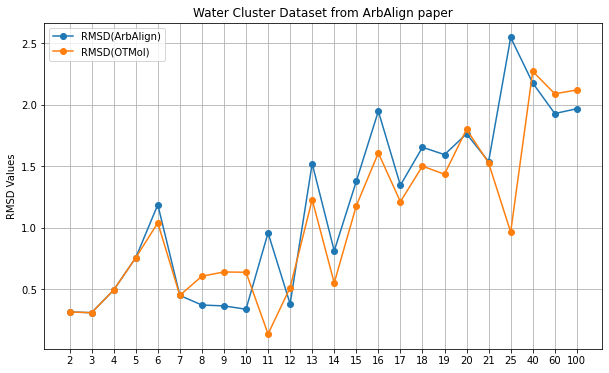

In [4]:
arbalign_res = pd.read_csv(os.path.join(data_path, 'rmsd-2017.dat'), sep='\s+')
combined_df = pd.concat([otmol_res, arbalign_res], axis=1).rename(columns={'RMSD(KM-ByAtomName)': 'RMSD(ArbAlign)'})
columns_to_plot = ["RMSD(ArbAlign)", "RMSD(OTMol)"]

plt.figure(figsize=(10, 6))
for column in columns_to_plot:
    plt.plot(range(len(combined_df['#'])), combined_df[column], marker='o', label=column)
plt.xticks(range(len(combined_df['#'])), combined_df['#'])

plt.title("Water Cluster Dataset from ArbAlign paper")
plt.ylabel("RMSD Values")
plt.legend()
plt.grid(True)

In [5]:
group1_data_path = "../Data/Our_Benchmark_20250410_ver1/Water_Cluster_3_30/water_xyz_output_1st_2nd"
group1_info = pd.read_csv('../Data/Our_Benchmark_20250410_ver1/Water_Cluster_3_30/water_cluster_1st_2nd_lowest_energy.csv')
group1_res = wc_experiment(zip(group1_info['Reference'], group1_info['Target']), group1_data_path, dataset_name = '1st2nd', molecule_cluster_options = molecule_cluster_options, save = save)

The number of candidate molecular level permutations is 6
Wat_3_cluster_0_1st_lowest.xyz Wat_3_cluster_1_2nd_lowest.xyz emd 1.49 0.42s
The number of candidate molecular level permutations is 24
Wat_4_cluster_2_1st_lowest.xyz Wat_4_cluster_3_2nd_lowest.xyz emd 0.95 0.42s
The number of candidate molecular level permutations is 51
Wat_5_cluster_12_1st_lowest.xyz Wat_5_cluster_13_2nd_lowest.xyz emd 0.13 0.44s
The number of candidate molecular level permutations is 13
Wat_6_cluster_31_1st_lowest.xyz Wat_6_cluster_32_2nd_lowest.xyz emd 0.22 0.42s
The number of candidate molecular level permutations is 63
Wat_7_cluster_137_1st_lowest.xyz Wat_7_cluster_138_2nd_lowest.xyz emd 0.78 0.45s
The number of candidate molecular level permutations is 149
Wat_8_cluster_607_1st_lowest.xyz Wat_8_cluster_608_2nd_lowest.xyz emd 0.61 0.49s
The number of candidate molecular level permutations is 114
Wat_9_cluster_1184_1st_lowest.xyz Wat_9_cluster_1185_2nd_lowest.xyz emd 0.58 0.48s
The number of candidate molec

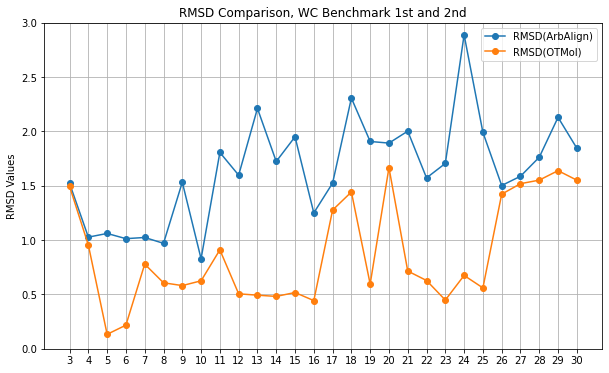

In [6]:
combined_df = pd.concat([group1_res, group1_info], axis=1).rename(columns={'Best_RMSD': 'RMSD(ArbAlign)'})
columns_to_plot = ["RMSD(ArbAlign)", "RMSD(OTMol)"]

plt.figure(figsize=(10, 6))
for column in columns_to_plot:
    plt.plot(range(len(combined_df['Wat_num'])), combined_df[column], marker='o', label=column)

plt.xticks(range(len(combined_df['Wat_num'])), combined_df['Wat_num'])
plt.title("RMSD Comparison, WC Benchmark 1st and 2nd")
plt.ylabel("RMSD Values")
plt.ylim(0, 3)
plt.legend()
plt.grid(True)

group2

In [7]:
group2_data_path = "../Data/Our_Benchmark_20250410_ver1/Water_Cluster_3_30/water_xyz_output_1st_to_20th"
group2_info = pd.read_csv('../Data/Our_Benchmark_20250410_ver1/Water_Cluster_3_30/water_cluster_largest_RMSD_pair_among_20_lowest_energy.csv')
group2_res = wc_experiment(zip(group2_info['Reference'], group2_info['Target']), group2_data_path, dataset_name = 'Largest_RMSD', molecule_cluster_options = molecule_cluster_options, save = save)

The number of candidate molecular level permutations is 6
Wat_3_cluster_0_lowest_1.xyz Wat_3_cluster_1_lowest_2.xyz emd 1.49 0.43s
The number of candidate molecular level permutations is 16
Wat_4_cluster_2_lowest_1.xyz Wat_4_cluster_10_lowest_9.xyz emd 1.39 0.42s
The number of candidate molecular level permutations is 51
Wat_5_cluster_13_lowest_2.xyz Wat_5_cluster_22_lowest_11.xyz emd 0.88 0.44s
The number of candidate molecular level permutations is 82
Wat_6_cluster_42_lowest_12.xyz Wat_6_cluster_50_lowest_20.xyz emd 0.93 0.45s
The number of candidate molecular level permutations is 40
Wat_7_cluster_137_lowest_1.xyz Wat_7_cluster_147_lowest_11.xyz emd 0.82 0.44s
The number of candidate molecular level permutations is 46
Wat_8_cluster_615_lowest_9.xyz Wat_8_cluster_616_lowest_10.xyz emd 0.72 0.45s
The number of candidate molecular level permutations is 114
Wat_9_cluster_1184_lowest_1.xyz Wat_9_cluster_1195_lowest_12.xyz emd 0.77 0.49s
The number of candidate molecular level permutation

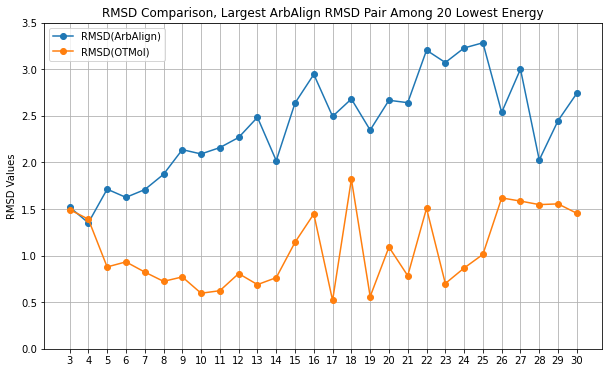

In [8]:
combined_df = pd.concat([group2_res, group2_info], axis=1).rename(columns={'Best_RMSD': 'RMSD(ArbAlign)'})
columns_to_plot = ["RMSD(ArbAlign)", "RMSD(OTMol)"]

plt.figure(figsize=(10, 6))
for column in columns_to_plot:
    plt.plot(range(len(combined_df['Wat_num'])), combined_df[column], marker='o', label=column)

plt.xticks(range(len(combined_df['Wat_num'])), combined_df['Wat_num'])
plt.title("RMSD Comparison, Largest ArbAlign RMSD Pair Among 20 Lowest Energy")
#plt.xlabel("Index (#)")  
plt.ylabel("RMSD Values")
plt.ylim(0, 3.5)
plt.legend()
plt.grid(True)

In [9]:
nameA = '5-CA-A.xyz'
nameB = '5-CA-B.xyz'
molA = next(pybel.readfile('xyz', os.path.join(data_path, nameA)))
molB = next(pybel.readfile('xyz', os.path.join(data_path, nameB)))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_res['assignment'][3]
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, otm.tl.permutation_to_matrix(assignment))
otm.pl.interactive_alignment_plot(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, nameA, nameB)

In [10]:
nameA = '10-PP1.xyz'
nameB = '10-PP2.xyz'
molA = next(pybel.readfile('xyz', os.path.join(data_path, nameA)))
molB = next(pybel.readfile('xyz', os.path.join(data_path, nameB)))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_res['assignment'][8]
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, otm.tl.permutation_to_matrix(assignment))
otm.pl.interactive_alignment_plot(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '10-PP1', '10-PP2')

In [11]:
nameA = otmol_res['nameA'][7]
nameB = otmol_res['nameB'][7]
assignment = otmol_res['assignment'][7]
molA = next(pybel.readfile('xyz', os.path.join(data_path, nameA)))
molB = next(pybel.readfile('xyz', os.path.join(data_path, nameB)))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, otm.tl.permutation_to_matrix(assignment))
otm.pl.interactive_alignment_plot(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, nameA, nameB)

In [12]:
assignment = otmol_res['assignment'][9]
nameA = otmol_res['nameA'][9]
nameB = otmol_res['nameB'][9]
molA = next(pybel.readfile('xyz', os.path.join(data_path, nameA)))
molB = next(pybel.readfile('xyz', os.path.join(data_path, nameB)))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, otm.tl.permutation_to_matrix(assignment))
otm.pl.interactive_alignment_plot(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, nameA, nameB)